In [14]:
import pandas as pd
df=pd.read_csv("C:\\Users\\Srushti\\Downloads\\insurance.csv")

In [15]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


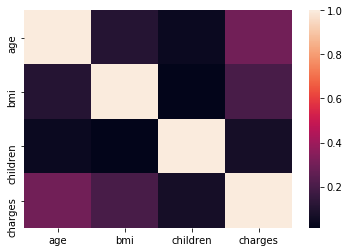

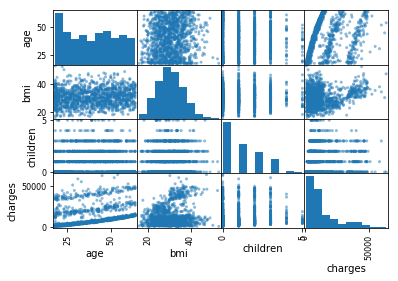

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [16]:
#corelation between numerical variables
#heat map
import seaborn as sns
sns.heatmap(df.corr())
#scatter matrix
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()
#table
df.corr()

In [17]:
from sklearn.preprocessing import LabelEncoder
#convert categorical variables into numerical
encode=LabelEncoder()
# 4 different regions (southwestas 3,southeast as 2,northwest as 1,northeast as 2)
df['region']=encode.fit_transform(df['region']) 
# smoker = yes as 1 and smoker = No as 0
df['smoker']=encode.fit_transform(df['smoker'])
# sex = Female as 0 and sex = Male as 1
df['sex']=encode.fit_transform(df['sex'])

In [18]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


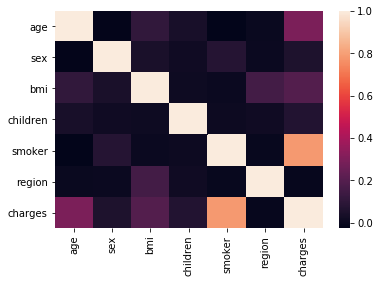

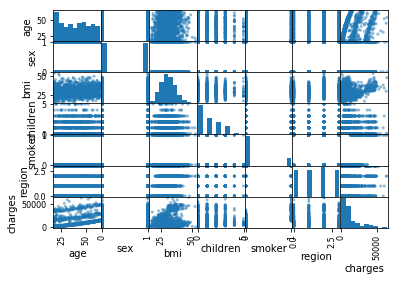

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


In [19]:
# corelation after converting categorical variable into numerical
#heat map
import seaborn as sns
sns.heatmap(df.corr())
#scatter matrix
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()
#table
df.corr() 

In [20]:
#remove target variable and create a separate variable with target vairable as y
X=df[['age','sex','bmi','children','smoker','region']]
y=df['charges']

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.8,random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
# fit the data
reg.fit(X_train,y_train)
#predict
pred_reg = reg.predict(X_test)

In [23]:
from sklearn.metrics import *
#r-square
print("R-square score = ",r2_score(y_test,pred_reg))
#mean square error
import math
print("Root Mean square error = ",math.sqrt(mean_squared_error(y_test,pred_reg)))
#intercept and model coefficients
print("Intercept = ",reg.intercept_ )
print("Coefficients = ",reg.coef_)

R-square score =  0.7451201723273824
Root Mean square error =  6058.813502095168
Intercept =  -13044.09443771689
Coefficients =  [  243.18642907  -309.48895723   399.47528263   407.35817691
 24861.83811962  -361.01418992]
